# Retorno Esperado
Representa uma média dos vários resultados esperados (valores possíveis) ponderada pela probabilidade atribuída a cada valor.

Pode ser calculado o retorno absoluto (em valor financeiro) ou o retorno relativo (em valor percentual).

**Exemplo 1**

Considere que uma ação tenha apresentado o seguite histórico de variações:

| Dia | Preço|
|-----|------|
|1 | R\\$ 10,00|
|2 | R\\$ 15,00|
|3 | R\\$  8,00|

- O retorno absoluto do dia 1 para o dia 2 foi de R\\$ 5,00.
- O retorno absoluto do período (dia 1 ao dia 3) foi de R\\$ -2,00.
- O retorno relativo do dia 1 para o dia 2 foi de 50\% (5,00 / 10,00).
- O retorno relativo do dia 1 para o dia 3 foi de -20\% (o preço caiu R\\$ 2,00 e valia originalmente R\\$ 10,00).

In [1]:
import pandas as pd
from datetime import datetime, date

In [22]:
import pandas as pd
import investpy as inv


# Ler a base
db_USD = pd.read_csv('USD.csv', sep=',', decimal = ',')
db_USD.reset_index(drop=False, inplace=True)

db_USD = db_USD.loc[:, ['dataHoraCotacao', 'cotacaoCompra']]
db_USD['dataHoraCotacao'] = [datetime.strptime(x[:10], '%Y-%m-%d').date() for x in db_USD['dataHoraCotacao']]
db_USD.drop_duplicates(subset='dataHoraCotacao', keep='first', inplace=True)

# Ajustando nome das colunas
db_USD.columns =  ['Data_base', 'Preco']

# Colocar o preço anterior numa coluna ao lado
db_USD['Preco_D-1'] = db_USD['Preco'].shift(1)
# Retorno simples financeiro (P_t - P(t-1))
db_USD['Retorno_Simples'] = db_USD['Preco'] - db_USD['Preco_D-1']
# Retorno relativo: (P_t - P_(t-1))/P_(t-1)
db_USD['Retorno_Relativo'] = db_USD['Retorno_Simples']/db_USD['Preco_D-1']
#db_USD['Retorno'] = db_USD['Preco']/db_USD['Preco'].shift(-1) - 1
db_USD

,Data_base,Preco,Preco_D-1,Retorno_Simples,Retorno_Relativo
0,2010-01-04,1.7250,NaN,NaN,NaN
17,2010-01-05,1.7170,1.7250,-0.0080,-0.004638
34,2010-01-06,1.7300,1.7170,0.0130,0.007571
51,2010-01-07,1.7350,1.7300,0.0050,0.002890
68,2010-01-08,1.7460,1.7350,0.0110,0.006340
...,...,...,...,...,...
18579,2021-04-26,5.4643,5.4500,0.0143,0.002624
18584,2021-04-27,5.4519,5.4643,-0.0124,-0.002269
18589,2021-04-28,5.4082,5.4519,-0.0437,-0.008016
18594,2021-04-29,5.3571,5.4082,-0.0511,-0.009449


In [26]:
# retorno de 20 dias

# ler a base
db_USD_2 = pd.read_csv('USD.csv', sep=',', decimal = ',')
db_USD_2.reset_index(drop=False, inplace=True)
db_USD_2 = db_USD_2.loc[:, ['dataHoraCotacao', 'cotacaoCompra']]
db_USD_2['dataHoraCotacao'] = [datetime.strptime(x[:10], '%Y-%m-%d').date() for x in db_USD_2['dataHoraCotacao']]
db_USD_2.drop_duplicates(subset='dataHoraCotacao', keep='first', inplace=True)

# Ajustando nome das colunas
db_USD_2.columns =  ['Data_base', 'Preco']

# Pega o preço de 20 dias atrás
db_USD_2['Preco_D-20'] = db_USD_2['Preco'].shift(20)
db_USD_2['Retorno_Simples'] = db_USD_2['Preco'] - db_USD_2['Preco_D-20']
db_USD_2['Retorno_Relativo'] = db_USD_2['Retorno_Simples']/db_USD_2['Preco_D-20']
db_USD_2

,Data_base,Preco,Preco_D-20,Retorno_Simples,Retorno_Relativo
0,2010-01-04,1.7250,NaN,NaN,NaN
17,2010-01-05,1.7170,NaN,NaN,NaN
34,2010-01-06,1.7300,NaN,NaN,NaN
51,2010-01-07,1.7350,NaN,NaN,NaN
68,2010-01-08,1.7460,NaN,NaN,NaN
...,...,...,...,...,...
18579,2021-04-26,5.4643,5.6788,-0.2145,-0.037772
18584,2021-04-27,5.4519,5.7086,-0.2567,-0.044967
18589,2021-04-28,5.4082,5.7920,-0.3838,-0.066264
18594,2021-04-29,5.3571,5.7783,-0.4212,-0.072893


In [27]:
import matplotlib.pyplot as plt

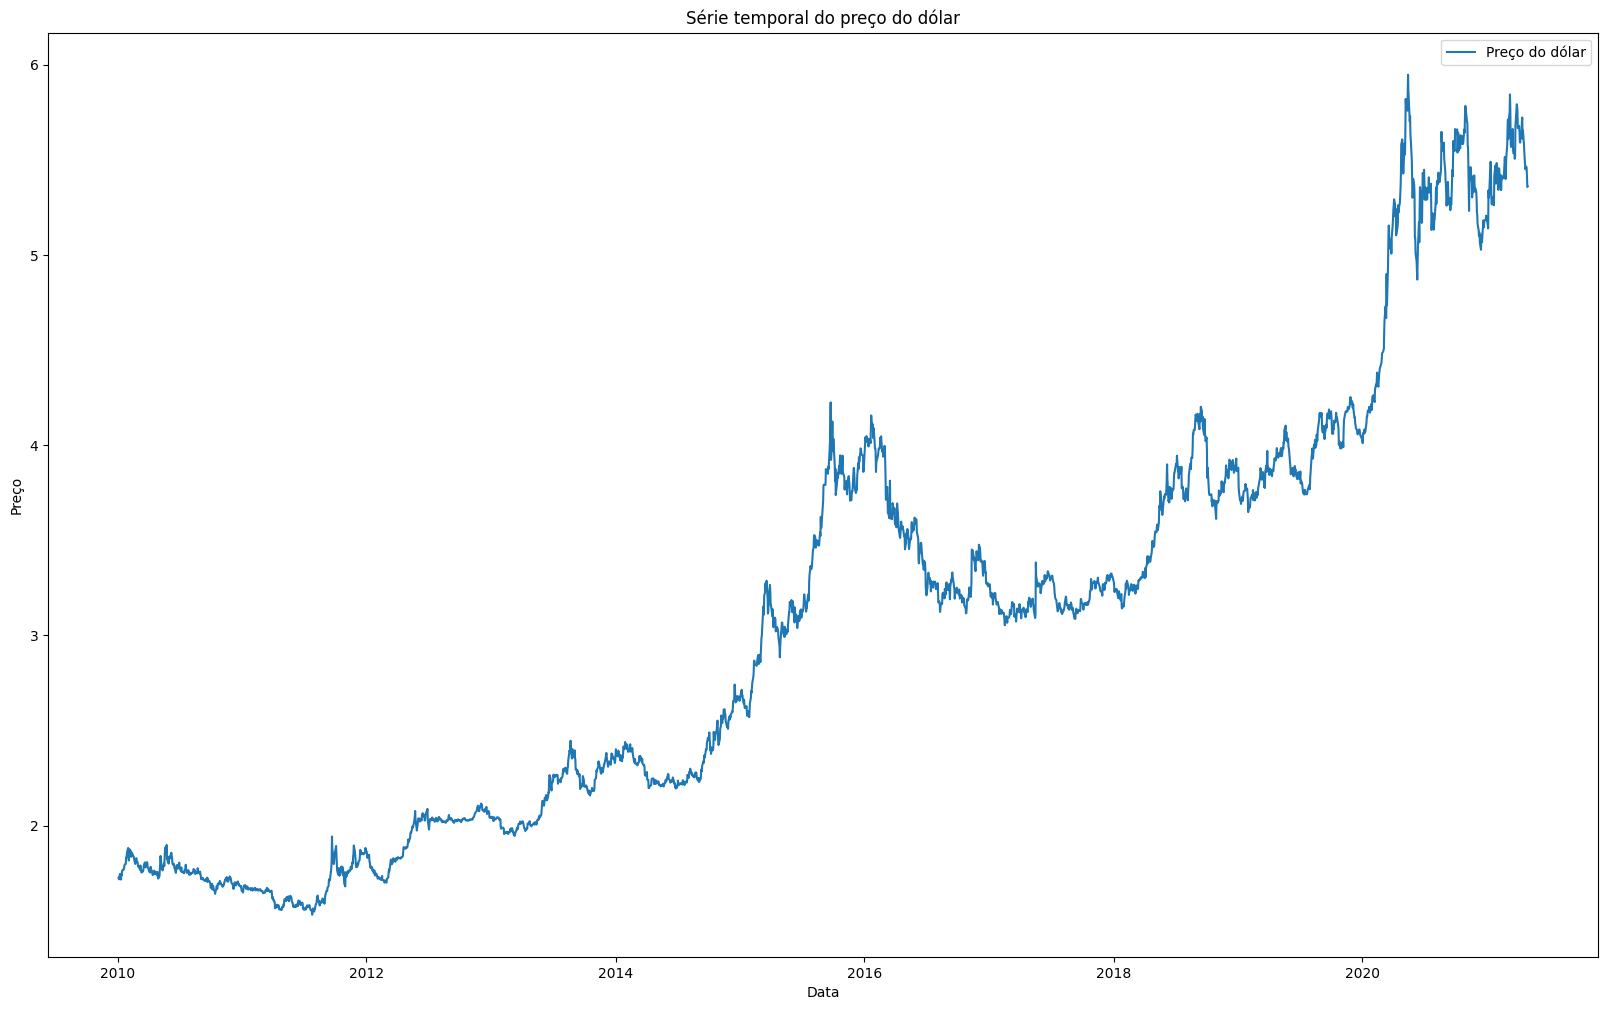

In [ ]:
# Gráfico da serie temporal de preço
plt.figure(figsize=(20,12))
plt.plot(db_USD_2['Data_base'], db_USD_2['Preco'], label='Preço do dólar')
plt.title('Série temporal do preço do dólar')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

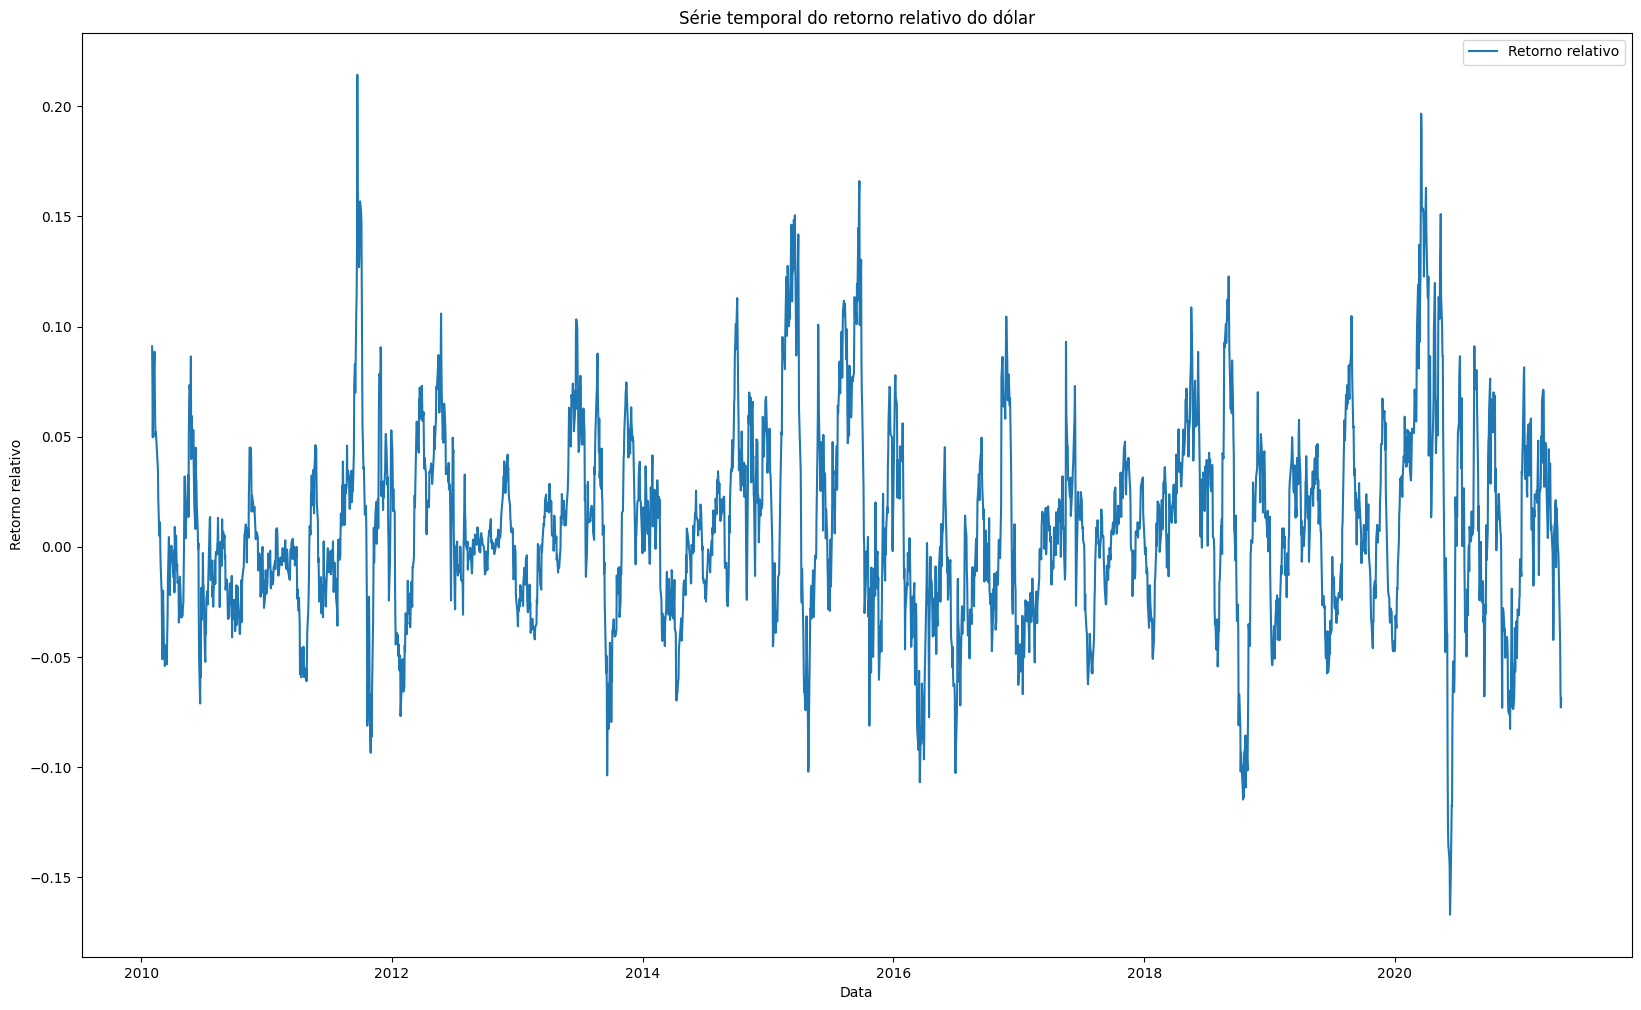

In [38]:
# Gráfico da serie temporal de retorno relativo
plt.figure(figsize=(20,12))
plt.plot(db_USD_2['Data_base'], db_USD_2['Retorno_Relativo'], label='Retorno relativo')
plt.title('Série temporal do retorno relativo do dólar')
plt.xlabel('Data')
plt.ylabel('Retorno relativo')
plt.legend()
plt.show()

## Definições Formais

Sejam:

- $P_t$: o preço no instante $t$;
- $R^{Abs}_t$: o retorno absoluto;
- $R^{Rel}_t$: o retorno relativo;

Podemos calcular os retornos como:

$$ R^{Abs}_t = P_t - P_{t-1} $$ 

$$ R^{Rel}_t = \frac{P_t  - P_{t-1}}{P_{t-1}} $$

Ou:

$$ R^{Rel}_t = \frac{R^{Abs}_t}{P_{t-1}} $$

Ou:

$$ R^{Rel}_t = \frac{P_t}{P_{t-1}} - 1$$

Também podemos calcular o retorno logaritmo, ou log-Retorno:

$$ r^{Rel}_t = ln\frac{P_t}{P_{t-1}}$$